# Cardio Vascular Disease

### 
* A leading cause of death globally is Cardiovascular diseases (CVDs).  
• CVDs accounted for 31% of all deaths worldwide.  
• Current data indicates 4 of 5 CVD deaths are due to hear attacks & strokes (1/3rd of these deaths occurred in people < 70yo.  
• Heart failure is a common event cause by CVDs.  
• This examines 11 features to evaluate their effectiveness as predictors for possible heart disease.   

This examines data obtained from this [data source.](https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1)

Data in this set represents those 11 elements from 918 observations. Those observations are a combination of 5 datasets independently available 
* Cleveland: 303 observations 
* Hungarian: 294 observations
* Switzerland: 123 observations 
* Long Beach VA: 200 observations 
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations

In [1]:
import pandas as pd
import seaborn as sns

## Load Data

In [3]:
file = 'data\heart.csv'
df = pd.read_csv(filePath)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Information about Data Elements
### 
**Age**: age of the patient [years]  
**Sex**: sex of the patient [M: Male, F: Female]  
**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
**RestingBP**: resting blood pressure [mm Hg]  
**Cholesterol**: serum cholesterol [mm/dl]  
**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or
depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]  
**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]  
**Oldpeak**: oldpeak = ST [Numeric value measured in depression]  
**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
**HeartDisease**: output class [1: heart disease, 0: Normal]  


# Exploratory Data Analysis

## Profiling and cleaning data as necessary

In [4]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [6]:
df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y 

In [10]:
df.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [11]:
df.notna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,True,True,True,True,True,True,True,True,True,True,True
914,True,True,True,True,True,True,True,True,True,True,True,True
915,True,True,True,True,True,True,True,True,True,True,True,True
916,True,True,True,True,True,True,True,True,True,True,True,True


In [12]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [16]:
df.notnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,True,True,True,True,True,True,True,True,True,True,True
914,True,True,True,True,True,True,True,True,True,True,True,True
915,True,True,True,True,True,True,True,True,True,True,True,True
916,True,True,True,True,True,True,True,True,True,True,True,True


In [21]:
# checking for NaN values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [22]:
# count for whole dataframe
df.isna().sum().sum()

0

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

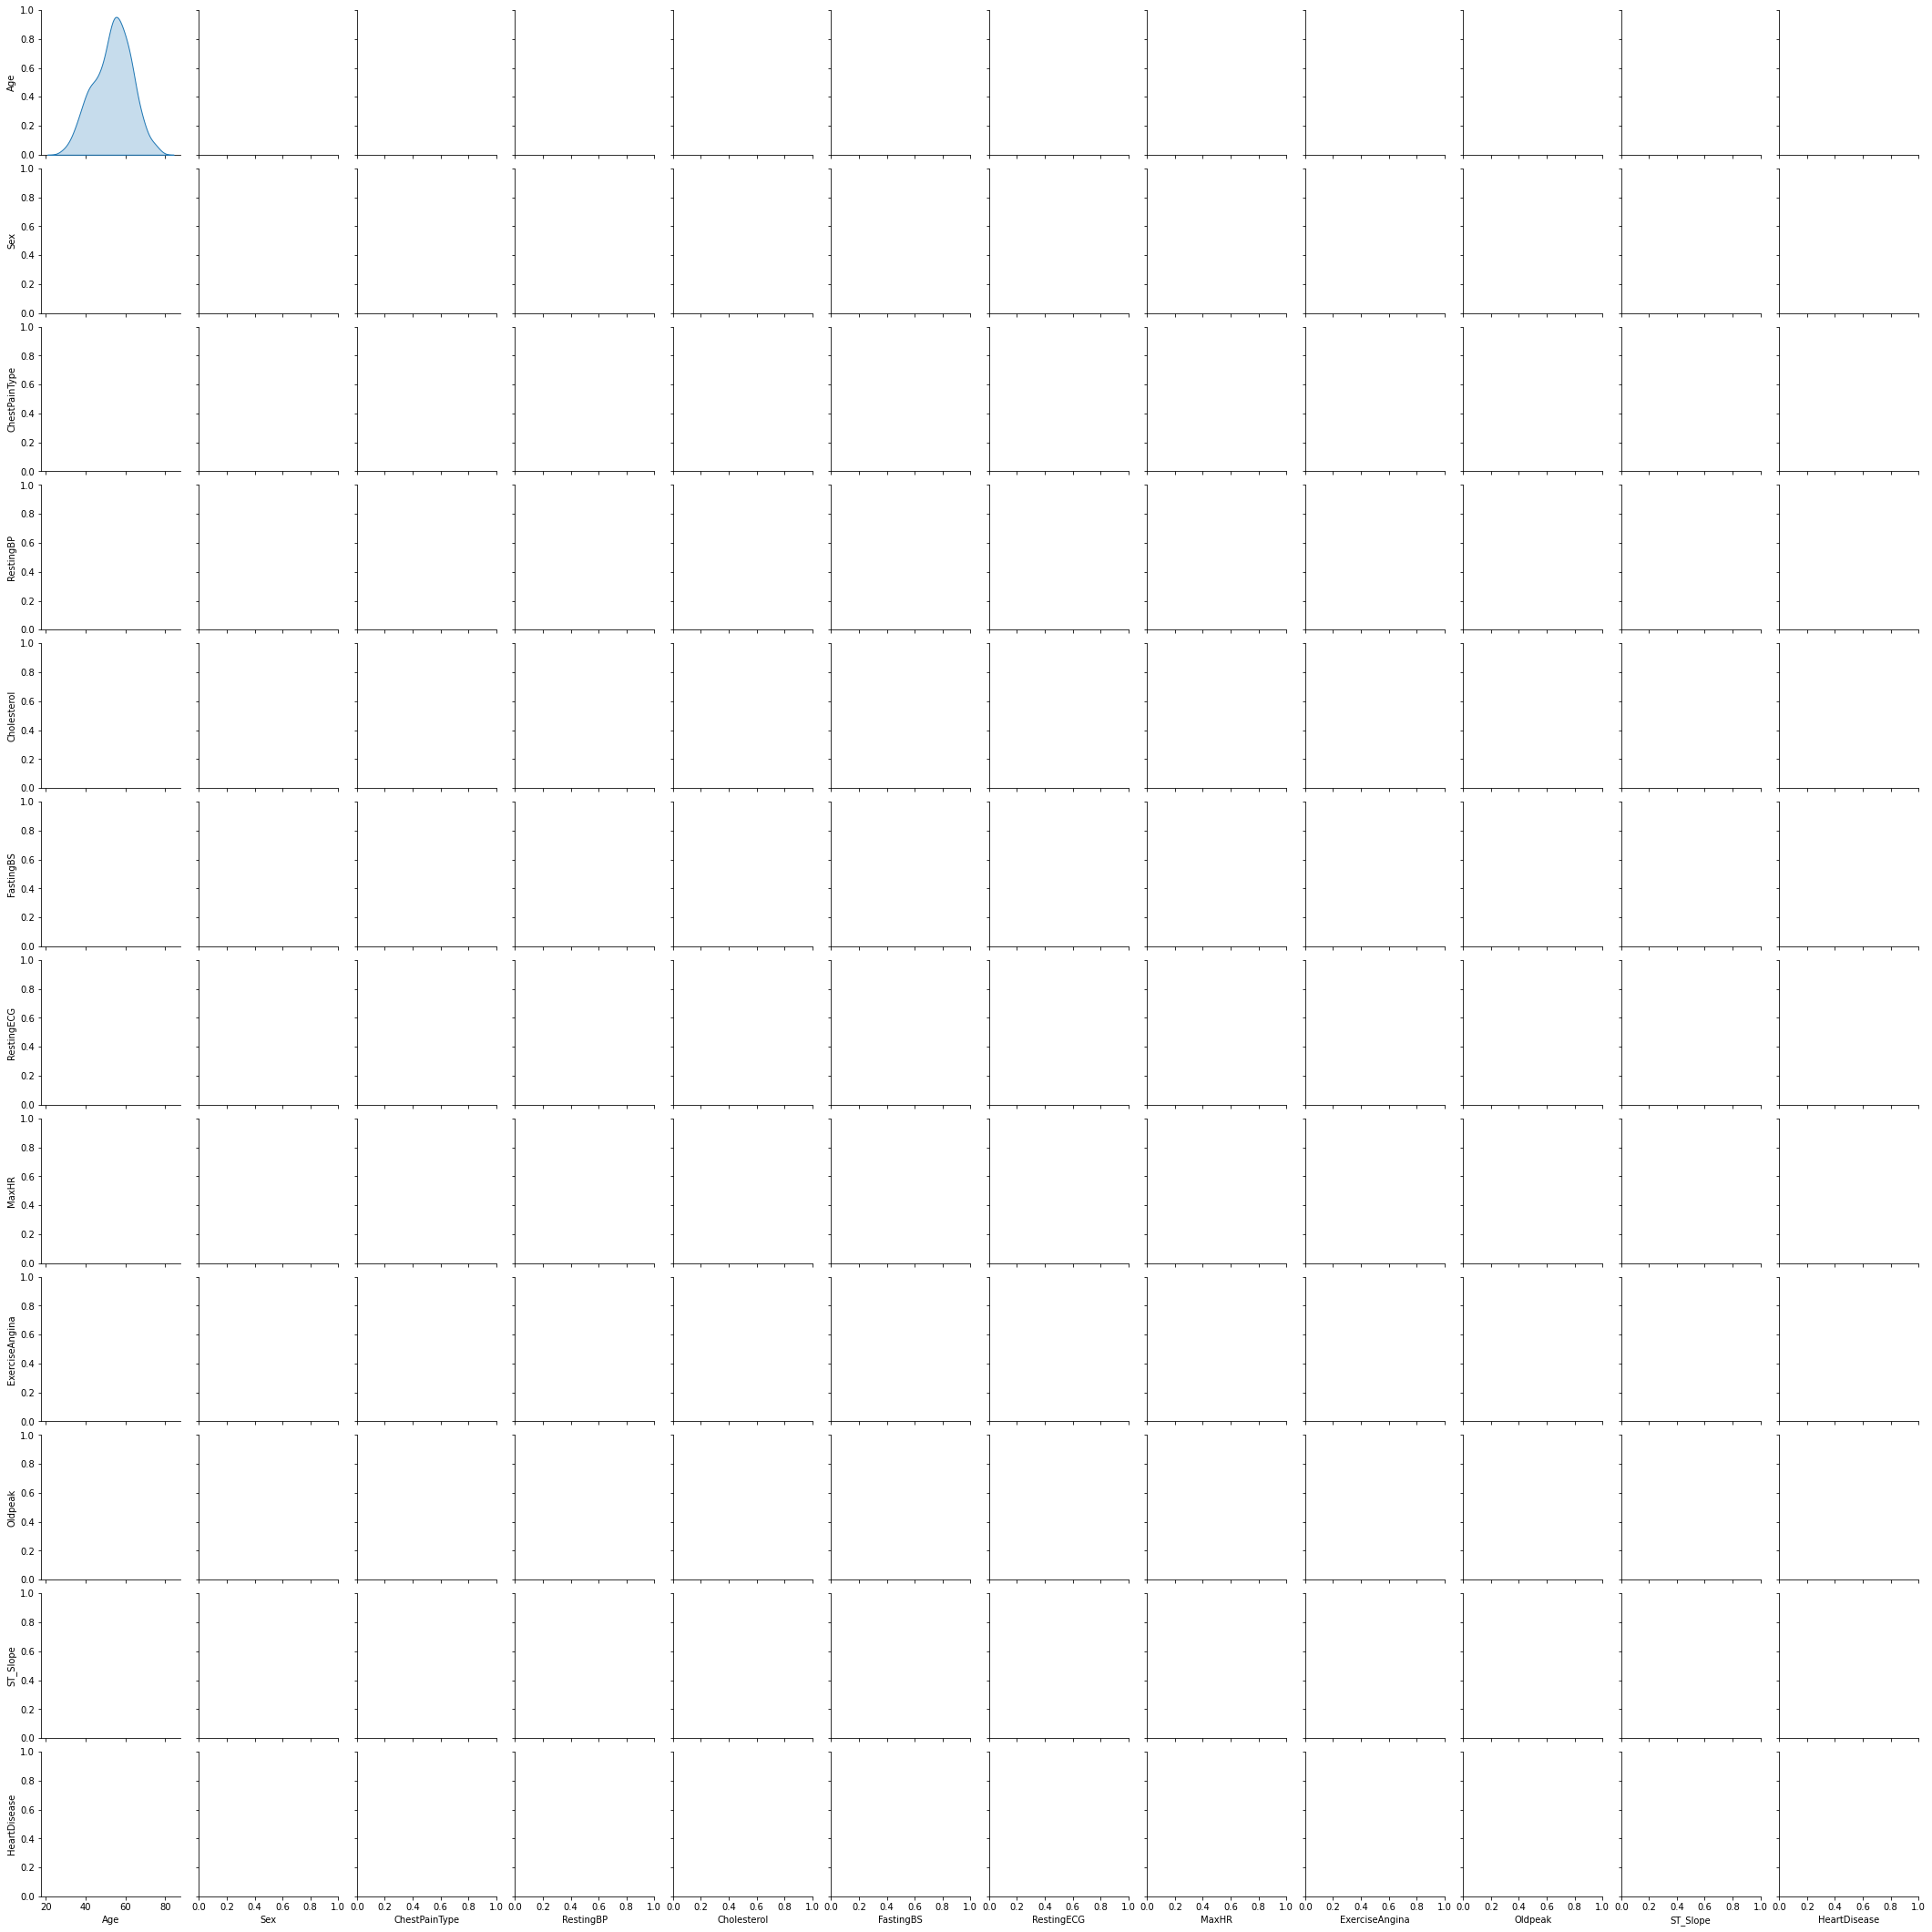

In [25]:
sns.pairplot(data=df,
    x_vars=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG',
    'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'],
    y_vars=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG',
    'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'],
    # x_vars=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG',
    # 'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'],
    # y_vars=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG',
    # 'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'],
    diag_kind='kde'
)